In [3]:
from nanodrivers.visa_drivers.anapico import ANAPICO
from nanodrivers.visa_drivers.SIM928_voltage_source import SIM # as DC
from nanodrivers.visa_drivers.vna import VNA
from nanodrivers.visa_drivers.signal_analyser import Anri

#math
import numpy as np
from numpy import *
from scipy.optimize import curve_fit

#plotting
import matplotlib.pyplot as plt
import matplotlib

#matlab import
import scipy.io
from scipy.io import savemat
from scipy.optimize import minimize
from scipy.fft import fft, ifft, fftshift, ifftshift


#file_store
import os

#time
import time
from datetime import datetime, timedelta


from ctypes import *
%matplotlib inline

Global_data_adress = r"C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA"
exp_name = 'TWPA_noise_5'
adress = Global_data_adress+'\\'+exp_name
if not os.path.exists(adress):
  os.mkdir(adress)
  print("Folder %s created!" % adress)
else:
  print("Folder %s already exists" % adress)

Folder C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_5 already exists


In [5]:
sa = Anri()
sa.idn()

Connection exist: ANRITSU,MS2830A,6200847105,4.09.01



In [60]:
data1 = sa.get_data()
T1 = 500 

In [66]:
data2 = sa.get_data()
T2 = 800 

In [72]:
data3 = sa.get_data()
T3 = 650 

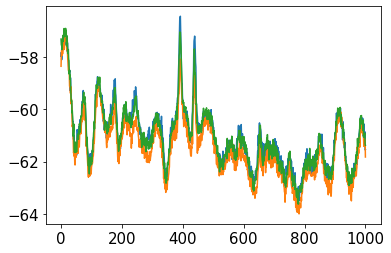

In [73]:
plt.plot(data2)
plt.plot(data1)
plt.plot(data3)

[71.13664839 63.74542749         nan ... 68.56839021         nan
 66.38747341] [ -2.99715331 -19.88146861   4.19914806 ...  -2.54293554   3.89271301
  -3.98367571]


C:\Users\Demag\AppData\Local\Temp\ipykernel_4784\3779396001.py:30: RuntimeWarning: invalid value encountered in log10
  print(10*np.log10(m_opt), -b_opt/m_opt)
C:\Users\Demag\AppData\Local\Temp\ipykernel_4784\3779396001.py:33: RuntimeWarning: invalid value encountered in log10
  ax[0].plot(freqs, 10*np.log10(m_opt), '8-')


(0.0, 5.0)

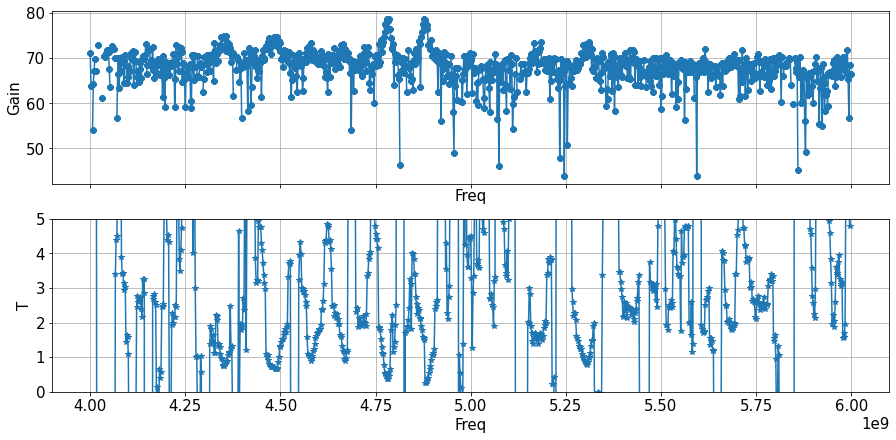

In [78]:
font = {'size': 15}
matplotlib.rc('font', **font)

def linear_model(x, m, b):
    return m * x + b

kb= 1.38e-23
Z0 = 50
BW = 50000
freqs = np.linspace(4e9,6e9,len(data1))

m_opt = np.array([])
b_opt = np.array([])

for i in range(len(data1)):

    x = np.array([T1*1e-3, T3*1e-3, T2*1e-3])
#     x = np.array([T1*1e-3, T2*1e-3])
    y = np.array([10**(data1[i]/10)/1e3/(kb*Z0*BW),
         10**(data3[i]/10)/1e3/(kb*Z0*BW),
         10**(data2[i]/10)/1e3/(kb*Z0*BW)])
#     y = np.array([10**(data1[i]/10)/1e3/(kb*Z0*BW),
#          10**(data2[i]/10)/1e3/(kb*Z0*BW)])

    popt, pcov = curve_fit(linear_model, x, y)

    m_opt = np.append(m_opt, popt[0])
    b_opt = np.append(b_opt, popt[1])
    
print(10*np.log10(m_opt), -b_opt/m_opt)
fig, ax = plt.subplots(2, 1, figsize = (15, 7), sharex = True)
ax[0].grid()
ax[0].plot(freqs, 10*np.log10(m_opt), '8-')
# ax.plot(x, linear_model(x,*popt))
ax[0].set_xlabel('Freq')
ax[0].set_ylabel('Gain')
ax[1].grid()

from scipy.ndimage import uniform_filter1d

window_size = 10
moving_avg = uniform_filter1d(b_opt / m_opt, size=window_size)

# Plot the moving average
ax[1].plot(freqs, moving_avg, '*-')

# ax[1].plot(freqs, b_opt/m_opt, '-')
# ax.plot(x, linear_model(x,*popt))
ax[1].set_xlabel('Freq')
ax[1].set_ylabel('T')
ax[1].set_ylim(0, 5)

In [48]:
m_opt

3.3159797643695254e-05

In [80]:
a = nan
np.isnan(a)

True